# Communicate Data Insights: Ford GoBike System Data (Part 2/2)

## by Brian Kogi

## Investigation Overview

In this presentation, I focus on:
1. The number of subscribers compared to the number of customers.
2. Distribution of Duration in Minutes
3. Ratio of Gender in Population
4. Hourly Average Distribution of Trips Between Weekdays And Weekends
5. Hourly Average Trip Duration Between Customers and Subscribers

## Dataset Overview

The Dataset consists of information regarding 183411 bike trips for the month of February, including its timing and geolocation of the start and end of each trip. The dataset 2017-fordgobike-tripdata.csv can be downloaded [here](https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("cleaned_data.csv")
weekend_data = df.query('start_weekday_char in ["Sat", "Sun"] ')
print(weekend_data.start_weekday_char.value_counts())
weekday_data = df.query('start_weekday_char in ["Mon", "Tue", "Wed", "Thu", "Fri"] ')
print(weekday_data.start_weekday_char.value_counts())

Sun    9278
Sat    9274
Name: start_weekday_char, dtype: int64
Thu    23426
Tue    21714
Wed    20192
Fri    19155
Mon    17983
Name: start_weekday_char, dtype: int64


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Number of subscribers compared to the number of customers
Here, we compare the number of subscribers compared to the number of customers. We can see that subscribers are more than customers by a huge margin.

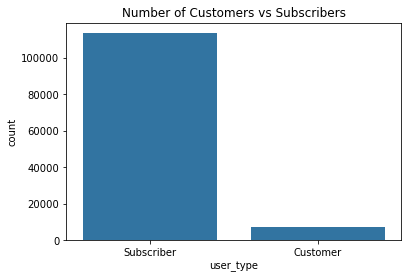

In [3]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='user_type', color=base_color);
plt.title("Number of Customers vs Subscribers");
# from this plot below we see that most users are subscribers

## Distribution of Duration
Here we observe the longevity of the trips in minutes and we can see that most trips are longer than 5 minutes with the highest time being 12 minutes. This hints that the destinations are not that far apart or most people use other means of transport when travelling longer distances.

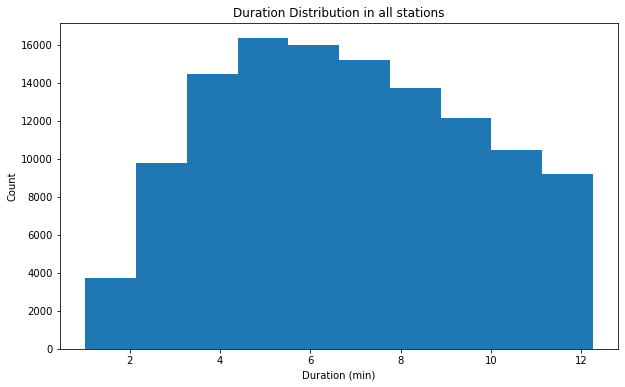

In [4]:
plt.figure(figsize=(10,6))
plt.hist(data=df, x='duration_min', )
plt.xlabel('Duration (min)')
plt.ylabel('Count')
plt.title('Duration Distribution in all stations');

## Ratio of Gender in Population
Here we observe that a majority of trips are started by men, with females making up less than a quarter of the population of users

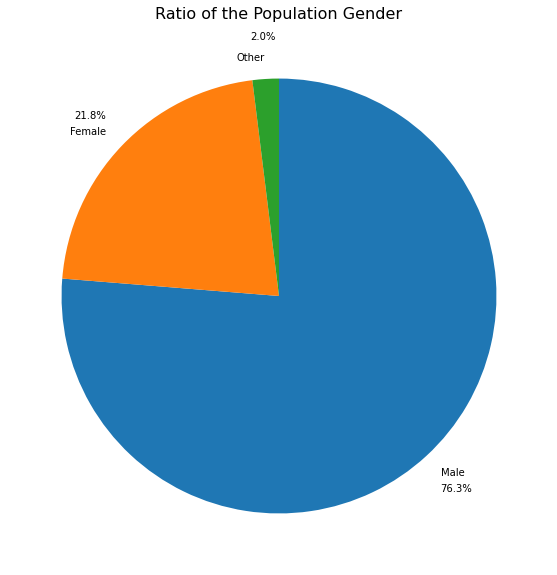

In [5]:
sorted_counts = df['member_gender'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.1f%%', pctdistance=1.2);
plt.title("Ratio of the Population Gender", fontsize=16);

## Hourly Average Distribution of Trips Between Weekdays And Weekends
The two graphs below depict the overall distribution of started trips during the day in weekdays and during the weekends. From the two distributions, we can see that during weekdays, the distribution is bimodal as most people start trips early in the morning or in the evening. We can also see that in the weekends, most trips start from 11:00am till evening.

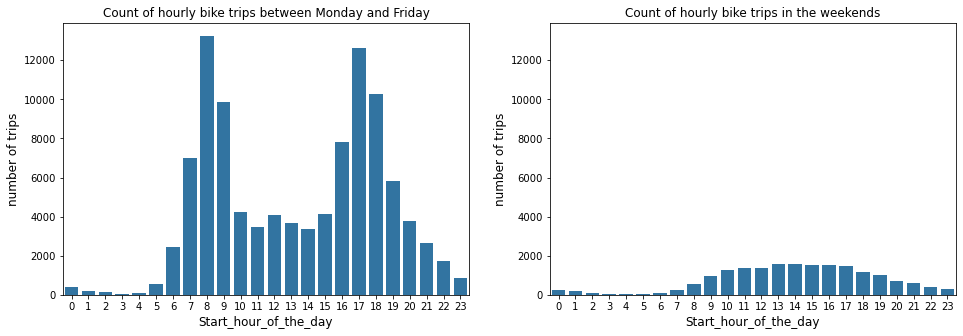

In [6]:
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.countplot(data=weekday_data, x='start_hour', color=base_color)
plt.xlabel('Start_hour_of_the_day', fontsize=12)
plt.ylabel('number of trips', fontsize=12)
plt.title('Count of hourly bike trips between Monday and Friday');
# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.countplot(data=weekend_data, x='start_hour', color=base_color)
plt.xlabel('Start_hour_of_the_day', fontsize=12)
plt.ylabel('number of trips', fontsize=12)
plt.title('Count of hourly bike trips in the weekends');
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

## Hourly Average Trip Duration Between Customers and Subscribers
This graph below tracks the difference between the average trip durations between customers and subscribers, we find that customers make longer trips on average during the day compared to subscribers, this is could be due to the lower number hence less variations in trip time or other reasons.

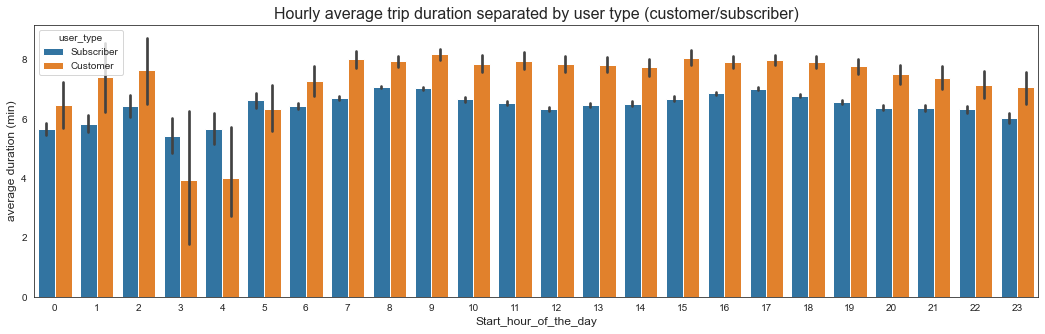

In [7]:
plt.figure(figsize=(18,5))
sb.set_style("white")
sb.barplot(data=df, x='start_hour', y="duration_min", hue='user_type', palette=["C0", "C1", "k"])
plt.xlabel('Start_hour_of_the_day', fontsize=12)
plt.ylabel('average duration (min)', fontsize=12)
plt.title('Hourly average trip duration separated by user type (customer/subscriber)', fontsize=16);

In [9]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 